In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from refnx.analysis import CurveFitter
from refnx.reflect import Slab

In [4]:
# will need to add the repo directory to sys.path (system specific)
sys.path.append('../')

from structureSE import RI
from dataSE import DataSE
from reflect_modelSE import ReflectModelSE
from objectiveSE import ObjectiveSE

In [5]:
dname = 'testData1_11nm_PNIPAM_on_Si_EP4.dat'
data = DataSE(data=dname)

WVASE_test = pd.read_csv(open('WVASE_example_2nmSiO2_15nmPNIPAM_658nm.txt','r'))

In [7]:
si     = RI('../materials/silicon.csv')
sio2   = RI('../materials/silica.csv')
PNIPAM = RI('../materials/pnipam.csv')
air    = RI('../materials/air.csv')

PNIPAM_layer = PNIPAM(150)
PNIPAM_layer.thick.setp(vary=True, bounds=(100,500))

struc = air() | PNIPAM_layer | sio2(20) | si()

model = ReflectModelSE(struc, wavelength=658)

# Comparison to WVASE output for 2nm SiO2 15nm PNIPAM system

[Text(0, 0.5, 'Delta')]

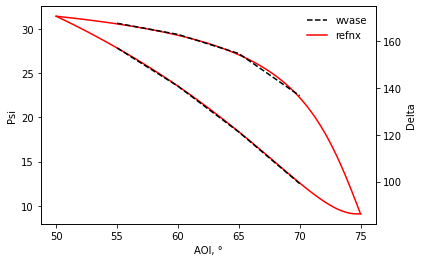

In [8]:
fig, ax = plt.subplots()
axt = ax.twinx()

aois = np.linspace(50,75,100)
psi, delta = model(aois)

ax.plot(WVASE_test['Angle of Incidence (°)'], WVASE_test['Psi (°)'],ls='--', color='k', zorder=5, label='wvase')
axt.plot(WVASE_test['Angle of Incidence (°)'], WVASE_test['Delta (°)'],ls='--', color='k', zorder=5)

ax.plot(aois, psi, color='r', label='refnx')
axt.plot(aois, delta, color='r')

ax.legend(frameon=False)

ax.set(ylabel='Psi', xlabel='AOI, °')
axt.set(ylabel='Delta')

# Fitting experimental Data

[Text(0, 0.5, 'Delta')]

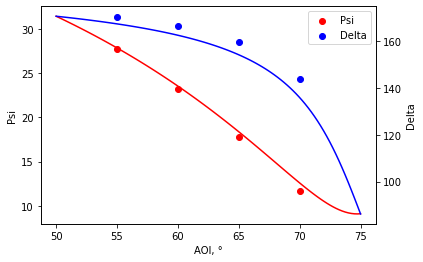

In [9]:
fig, ax = plt.subplots()
axt = ax.twinx()

aois = np.linspace(50,75,100)
psi, delta = model(aois)
ax.plot(aois, psi, color='r')
p = ax.scatter(data.aoi, data.psi, color='r')

axt.plot(aois, delta, color='b')
d = axt.scatter(data.aoi, data.delta, color='b')

ax.legend(handles=[p,d], labels=['Psi', 'Delta'])
ax.set(ylabel='Psi', xlabel='AOI, °')
axt.set(ylabel='Delta')

In [10]:
objective = ObjectiveSE(model, data)

In [11]:
fitter = CurveFitter(objective)
fitter.fit(method='differential_evolution');

10it [00:00, 20.27it/s]


[Text(0, 0.5, 'Delta')]

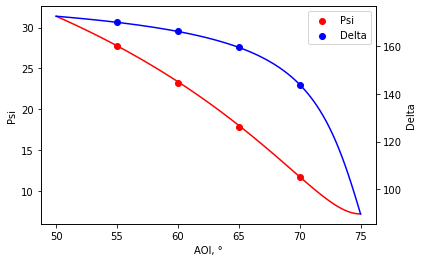

In [12]:
fig, ax = plt.subplots()
axt = ax.twinx()

aois = np.linspace(50,75,100)
psi, delta = model(aois)
ax.plot(aois, psi, color='r')
p = ax.scatter(data.aoi, data.psi, color='r')

axt.plot(aois, delta, color='b')
d = axt.scatter(data.aoi, data.delta, color='b')

ax.legend(handles=[p,d], labels=['Psi', 'Delta'])
ax.set(ylabel='Psi', xlabel='AOI, °')
axt.set(ylabel='Delta')

In [14]:
objective.model.structure[1].thick.value

112.53127696668581